# Exercicio 2
* Arthur Severo
* Victor Le Roy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Coletando os dados**

In [2]:
df = pd.read_csv('./data/data2.txt', sep=',', header=None, names=['House size', 'Number of bedrooms', 'House price'])
house_sizes = df['House size'].values
number_of_bedrooms = df['Number of bedrooms'].values
house_prices = df['House price'].values

print(df)

    House size  Number of bedrooms  House price
0         2104                   3       399900
1         1600                   3       329900
2         2400                   3       369000
3         1416                   2       232000
4         3000                   4       539900
5         1985                   4       299900
6         1534                   3       314900
7         1427                   3       198999
8         1380                   3       212000
9         1494                   3       242500
10        1940                   4       239999
11        2000                   3       347000
12        1890                   3       329999
13        4478                   5       699900
14        1268                   3       259900
15        2300                   4       449900
16        1320                   2       299900
17        1236                   3       199900
18        2609                   4       499998
19        3031                   4      

**3. Plotando a funcao sem normalizar**

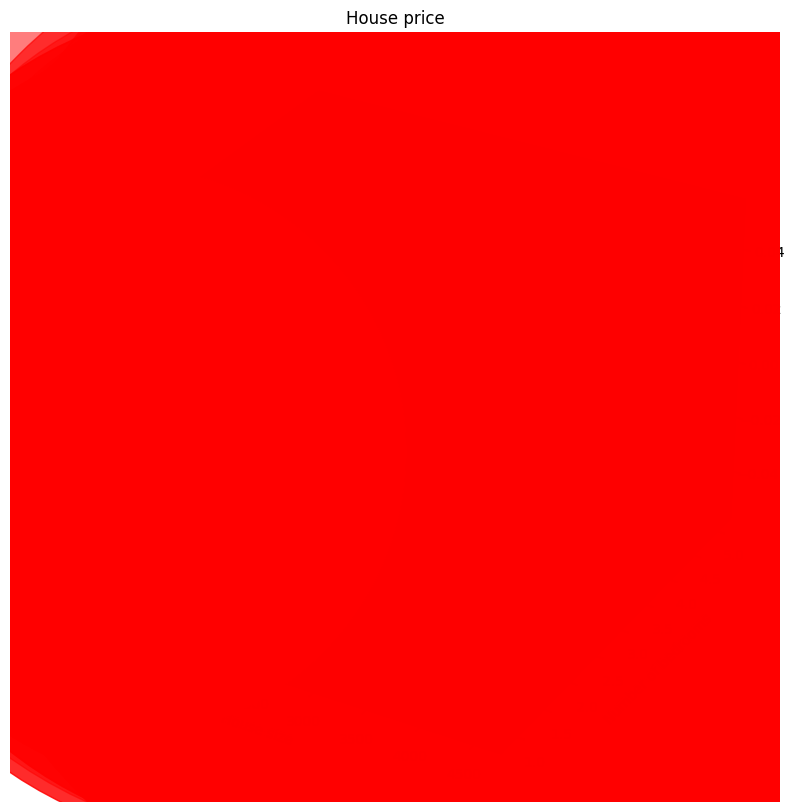

In [3]:
plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.scatter(house_sizes, number_of_bedrooms, house_prices, c='r', marker='o')
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.title('House price')
plt.show()

**4. Feature Normalization**

In [4]:
mean_house_sizes = np.mean(house_sizes)
mean_number_of_bedrooms = np.mean(number_of_bedrooms)
mean_house_prices = np.mean(house_prices)

for i in range(len(house_sizes)):
  house_sizes[i] = house_sizes[i] - mean_house_sizes
  number_of_bedrooms[i] = number_of_bedrooms[i] - mean_number_of_bedrooms
  house_prices[i] = house_prices[i] - mean_house_prices

std_house_sizes = np.std(house_sizes)
std_number_of_bedrooms = np.std(number_of_bedrooms)
std_house_prices = np.std(house_prices)

for i in range(len(house_sizes)):
  house_sizes[i] = house_sizes[i] / std_house_sizes
  number_of_bedrooms[i] = number_of_bedrooms[i] / std_number_of_bedrooms
  house_prices[i] = house_prices[i] / std_house_prices


**5. Plotando a funcao normalizada**

c:\Development\Python3.11.3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


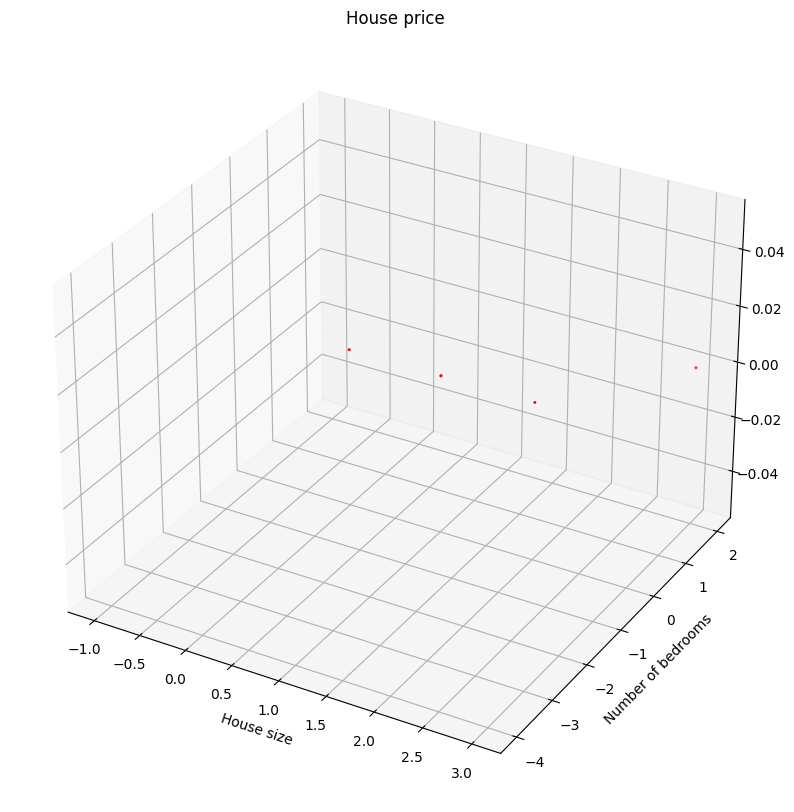

In [5]:
plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.scatter(house_sizes, number_of_bedrooms, house_prices, c='r', marker='o')
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.title('House price')
plt.show()

**6. Gradiente descendente**

In [6]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.01
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_1 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * house_prices + theta_2 * number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - house_prices) * house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - house_prices) * number_of_bedrooms)
    h_per_epoch_1.append(h)

In [7]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.03
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_2 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * house_prices + theta_2 * number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - house_prices) * house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - house_prices) * number_of_bedrooms)
    h_per_epoch_2.append(h)

In [8]:
theta_0, theta_1, theta_2 = 1, 1, 1
alpha = 0.1
epochs = 1500
m = len(house_sizes)
n = len(number_of_bedrooms)

h_per_epoch_3 = []

for epoch in range(epochs):
    h = theta_0 + theta_1 * house_prices + theta_2 * number_of_bedrooms
    theta_0 = theta_0 - alpha * (1 / m) * np.sum(h - house_prices)
    theta_1 = theta_1 - alpha * (1 / m) * np.sum((h - house_prices) * house_sizes)
    theta_2 = theta_2 - alpha * (1 / m) * np.sum((h - house_prices) * number_of_bedrooms)
    h_per_epoch_3.append(h)

**7.1. Plot do gradiente com alpha 0.01**

* Resultado final

**7.2. Plot do gradiente com alpha 0.03**

* Resultado final

**7.3. Plot do gradiente com alpha 0.1**

* Resultado final

**8. Veja que agora não é possível traçar o ajuste linear como no exercício anterior. Por quê?**